In [6]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.morphology import binary_erosion, binary_dilation

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

(780, 780, 3) (780, 780, 3)


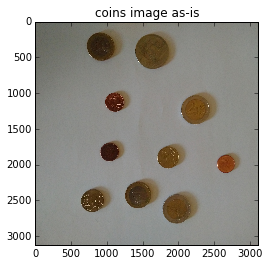

In [25]:
#read the coins image as a ubyte
coins = img_as_ubyte(imread('images/coins.jpg'))

#display original image
plt.figure()
plt.imshow(coins)
plt.title('coins image as-is')

#rescale coins
from skimage.transform import rescale
coins = rescale(coins, 0.25, order=1, mode='constant', cval=0, clip=True, preserve_range=False)

#display dimensions of original image and the rescaled image
print (coins.shape, coins.shape)



Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

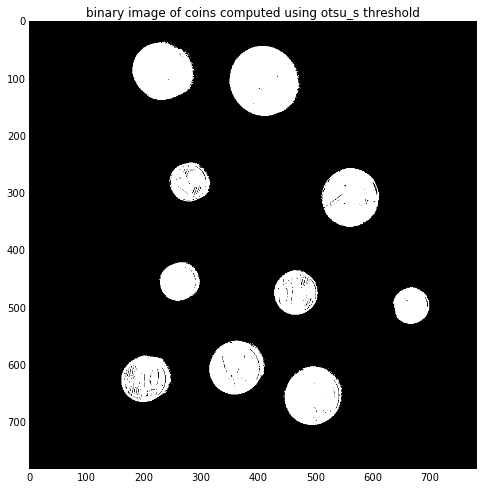

In [55]:
#convert rgb coins to grey
coins_grey = rgb2gray(coins)

#compute otsu's threshold
from skimage import filters
otsu_coins = filters.threshold_otsu(coins)

#apply otsu's threshold to get binary image of coins
coins_binary_otsu = coins_grey < otsu_coins

#display binary image
plt.figure(figsize=(10,8))
plt.imshow(coins_binary_otsu, cmap = 'Greys_r')
plt.title('binary image of coins computed using otsu_s threshold')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

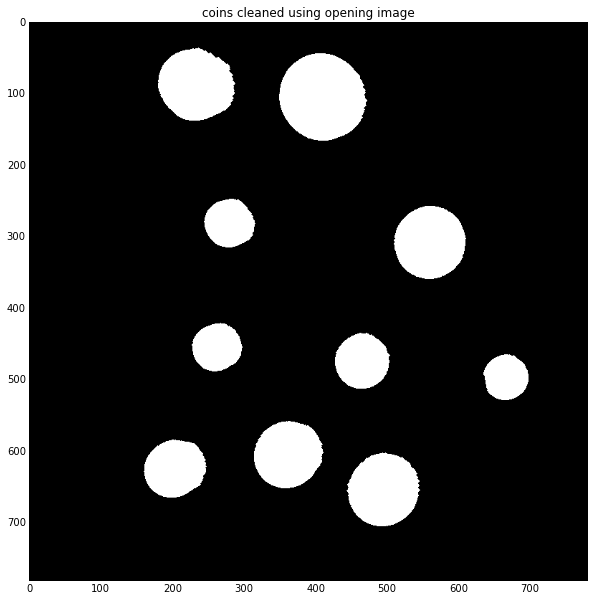

In [78]:
#coins_im = img_as_ubyte(coins_im)
#max_img = 255
#coins_im = rgb2gray(coins_im)
#val = threshold_otsu(coins_im)
#new = coins_im >= 101
#imshow(new)
#plt.show()

#coins_ero = binary_erosion(new,disk(2))
#imshow(coins_ero)
#plt.show()
#coins_dil = binary_dilation(coins_ero, disk(2))
#imshow(coins_dil)
#plt.show()
#coins_cl = binary_closing(coins_dil, disk(2))
#imshow(coins_cl)
#plt.show()
#coins_op = binary_opening(coins_cl, disk(2))
#imshow(coins_op)
#plt.show()

#new operations



coins_cleaned = coins_binary_otsu

#num_erosions = 3
#for i in range(0, num_erosions):
    #coins_cleaned = binary_dilation(coins_cleaned,disk(2))

num_dilations = 5
for i in range(0, num_dilations):
    coins_cleaned = binary_closing(coins_cleaned, disk(2))

num_dilations = 5
for i in range(0, num_dilations):
    coins_cleaned = binary_opening(coins_cleaned, disk(2))    

#display cleaned image
plt.figure(figsize=(20,10))
plt.imshow(coins_cleaned, cmap= 'Greys_r')
plt.title('coins cleaned using opening image')







Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

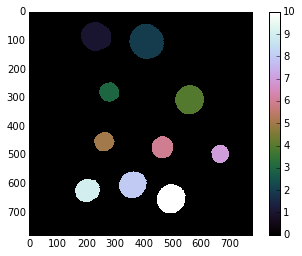

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 11)


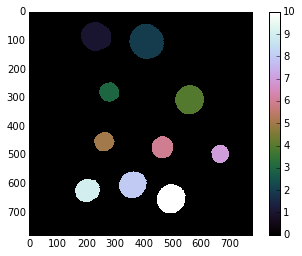

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 11)
# of 1-connected regions =  11
# of 2-connected regions =  11


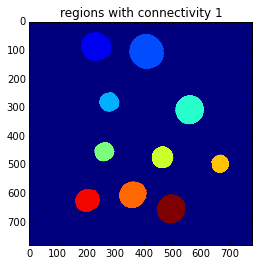

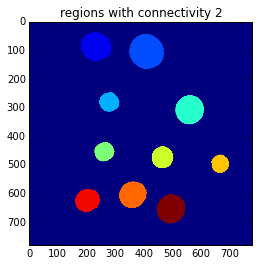

In [79]:
#connectivity 2
new1 = label(coins_cleaned, connectivity=2,)
imshow(new1)
plt.show()
print(label(new1, connectivity=2,return_num = True))

#connectivity 1
new2 = label(coins_cleaned, connectivity=1,)
imshow(new2)
plt.show()
print(label(new2, connectivity=1,return_num = True))







labeled_coins_1, nregions_1 = label(coins_cleaned,return_num=True, connectivity=1)
labeled_coins_2, nregions_2 = label(coins_cleaned, return_num=True, connectivity=2)


print ('# of 1-connected regions = ', nregions_1)
print ('# of 2-connected regions = ', nregions_2)

#display labeled coins, labeled with regions of connectivity 1 and 2
plt.figure()
plt.imshow(labeled_coins_1)
plt.title('regions with connectivity 1')

plt.figure()
plt.imshow(labeled_coins_2)
plt.title('regions with connectivity 2')

#use region props to make measurements on detected regions
from skimage import measure, draw


image = labeled_coins_1
regions = measure.regionprops(image)


for i in range(0, len(regions)):
    region = regions[i]
    
    c = region.centroid
    perimeter = region.perimeter
    r = perimeter / (2.0 * np.pi)
    
    coords = draw.circle_perimeter(int(c[0]), int(c[1]), int(r))

    

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 